#Here i am doing Case study of baseball where data from 2014 league baseball to develop an algorithm that predicts
the number of wins for a given team in the 2015 season based on several different indicators of success.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing data into pandas for further analysis 

In [2]:
df=pd.read_csv("Baseball.csv")

In [3]:
#Chech 8 head rows of data frame 

In [4]:
df.head(8)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In [5]:
df.tail(8)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
#Find useful information about the DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
#Let find a summary of descriptive statistics for each column in the DataFrame

df.describe(include="all")

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
# Here we find type of data types of each column as its values.

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
# the shape of the data

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [12]:
# the shape of the data frame

df.shape

(30, 17)

In [13]:
#Checking null values in Data Frame

df.nunique().to_frame("unique values")

,unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#There is only few skewness in data set 
#Skewness measures the asymmetry of the distribution of values in a dataset relative to a normal distribution.
A skewness value of 0 indicates a symmetric distribution,while positive or negative values indicate right or left skew,
respectively

In [15]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


# Here we computes the pairwise correlation coefficients between columns of a DataFrame, providing insights into the relationships and dependencies between variables in the dataset. The resulting correlation matrix (dfcor) can be used for various analytical and modeling purposes.

In [16]:
np.mean(df["SHO"])

11.3

Visualization

Now, let’s visualize the distribution of continuous features

<Axes: >

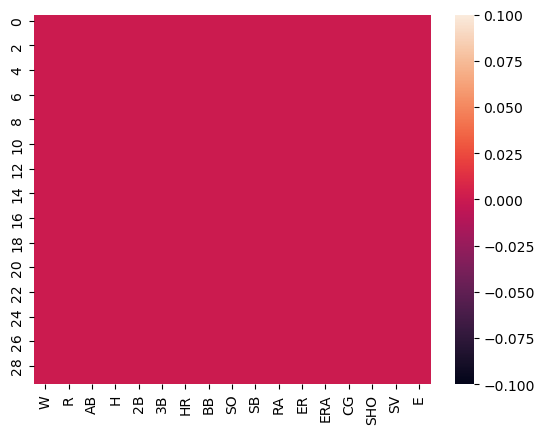

In [17]:
sns.heatmap(df.isnull())

<Axes: >

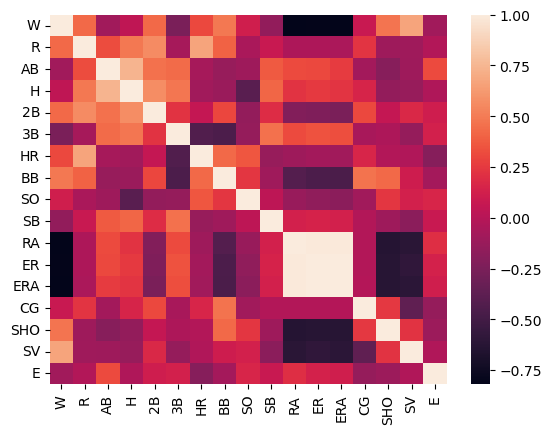

In [18]:
sns.heatmap(dfcor)

In [19]:
df=df.drop_duplicates()
print("Rows and columns after droping duplicate:",df.shape)

Rows and columns after droping duplicate: (30, 17)


In [20]:
df["W"].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [21]:
df["W"].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

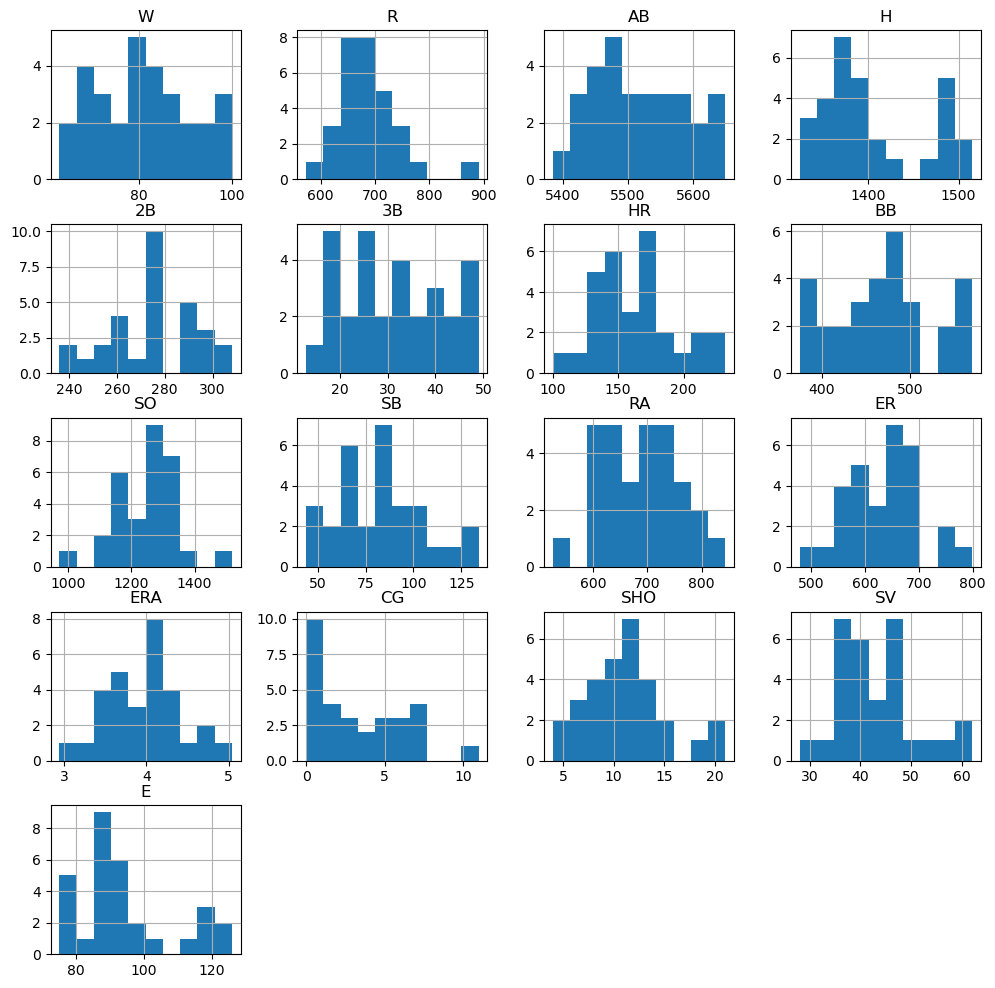

In [22]:
df.hist(figsize=(12,12))
plt.show()

<Axes: >

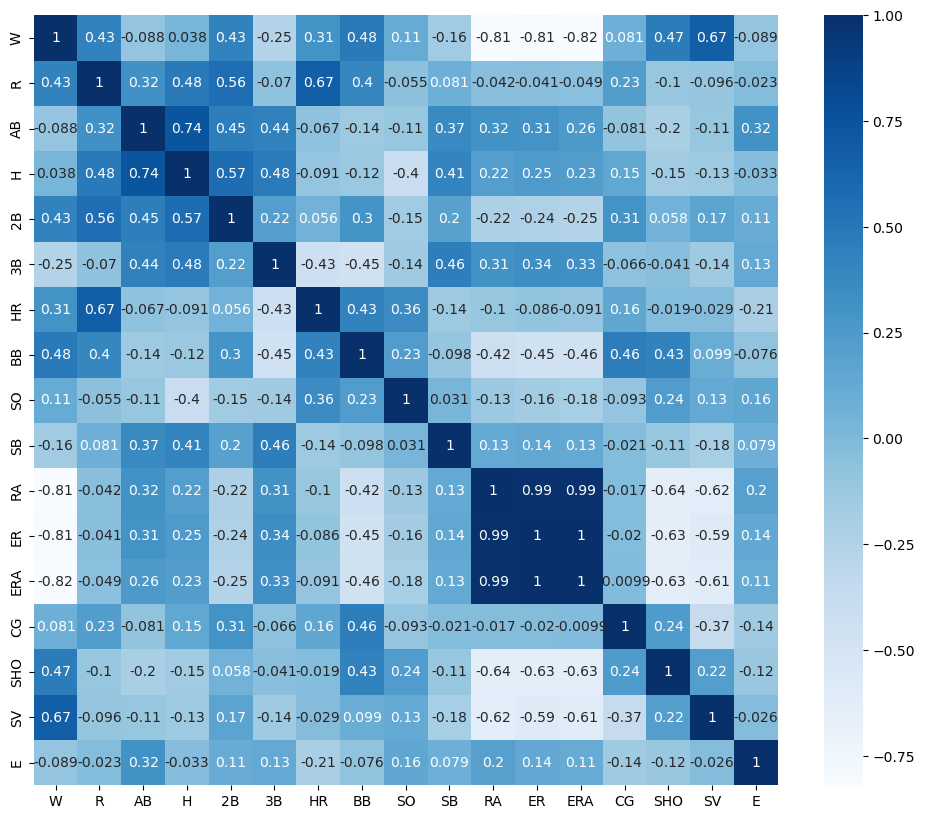

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

Runs are linearly corelated to Home runs(HR) ,Doubles(2B) ,Hit (H) and win (W) ,
Hits is weakly related to win ,
Doubles are linearly related to win with no outliers ,
Triples (3B) has very weak negative correlation to ein with no outliers ,
Earn run is highly correlated with Earn run average ,


0.5657904298216165


<Axes: xlabel='SHO', ylabel='Density'>

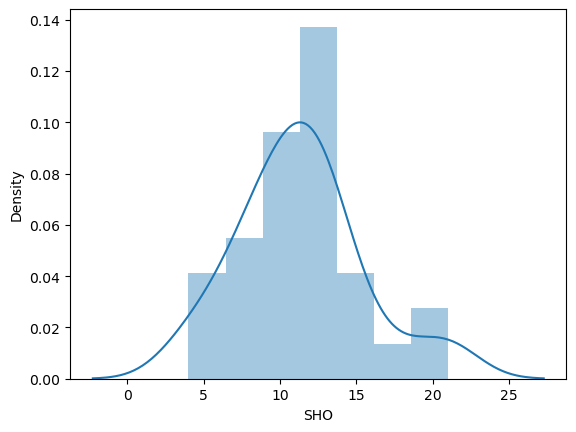

In [24]:
print(df["SHO"].skew())
sns.distplot(df["SHO"],kde=True)

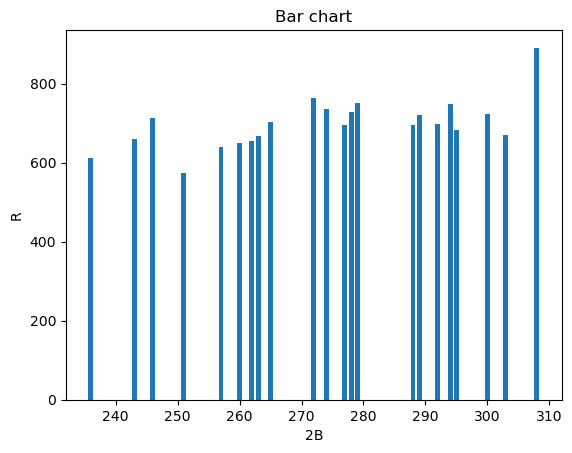

In [25]:
plt.bar(df["2B"],df["R"])
plt.title("Bar chart")
plt.xlabel("2B")
plt.ylabel("R")
plt.show()

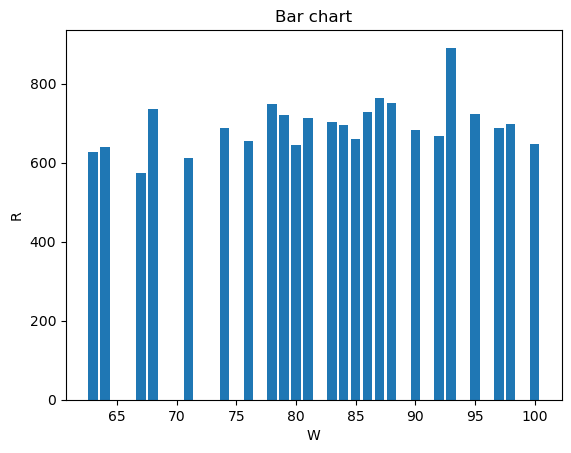

In [26]:
plt.bar(df["W"],df["R"])
plt.title("Bar chart")
plt.xlabel("W")
plt.ylabel("R")
plt.show()

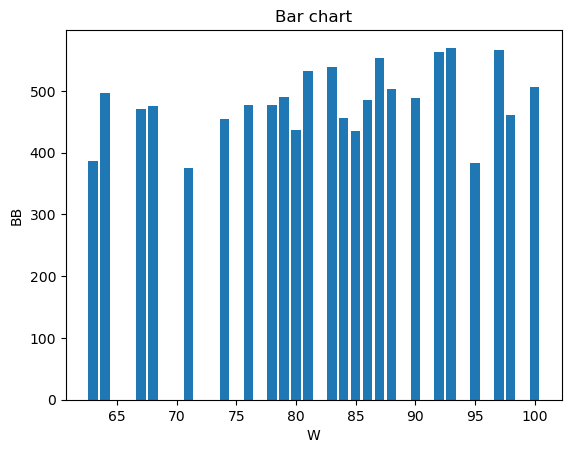

In [27]:
plt.bar(df["W"],df["BB"])
plt.title("Bar chart")
plt.xlabel("W")
plt.ylabel("BB")
plt.show()

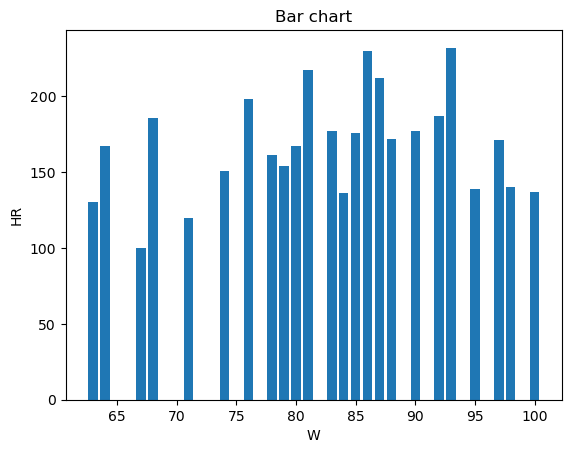

In [28]:
plt.bar(df["W"],df["HR"])
plt.title("Bar chart")
plt.xlabel("W")
plt.ylabel("HR")
plt.show()

0.8901318267689016


<Axes: xlabel='E'>

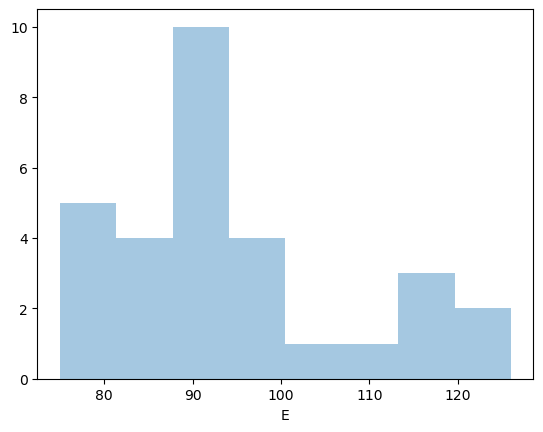

In [29]:
print(df["E"].skew())
sns.distplot(df["E"],kde=False)

<Axes: xlabel='AB', ylabel='R'>

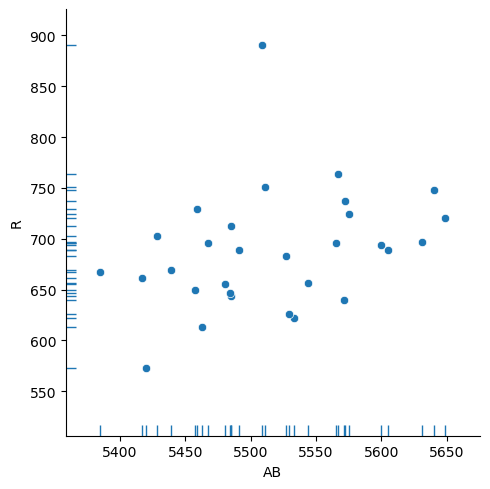

In [30]:
sns.relplot(data=df,x="AB",y="R")
sns.rugplot(data=df,x="AB",y="R",legend=False)

<Axes: >

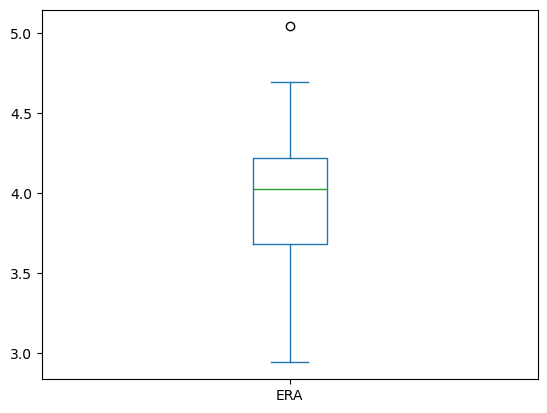

In [31]:
df["ERA"].plot.box()

W         Axes(0.125,0.712609;0.0824468x0.167391)
R      Axes(0.223936,0.712609;0.0824468x0.167391)
AB     Axes(0.322872,0.712609;0.0824468x0.167391)
H      Axes(0.421809,0.712609;0.0824468x0.167391)
2B     Axes(0.520745,0.712609;0.0824468x0.167391)
3B     Axes(0.619681,0.712609;0.0824468x0.167391)
HR     Axes(0.718617,0.712609;0.0824468x0.167391)
BB     Axes(0.817553,0.712609;0.0824468x0.167391)
SO        Axes(0.125,0.511739;0.0824468x0.167391)
SB     Axes(0.223936,0.511739;0.0824468x0.167391)
RA     Axes(0.322872,0.511739;0.0824468x0.167391)
ER     Axes(0.421809,0.511739;0.0824468x0.167391)
ERA    Axes(0.520745,0.511739;0.0824468x0.167391)
CG     Axes(0.619681,0.511739;0.0824468x0.167391)
SHO    Axes(0.718617,0.511739;0.0824468x0.167391)
SV     Axes(0.817553,0.511739;0.0824468x0.167391)
E          Axes(0.125,0.31087;0.0824468x0.167391)
dtype: object

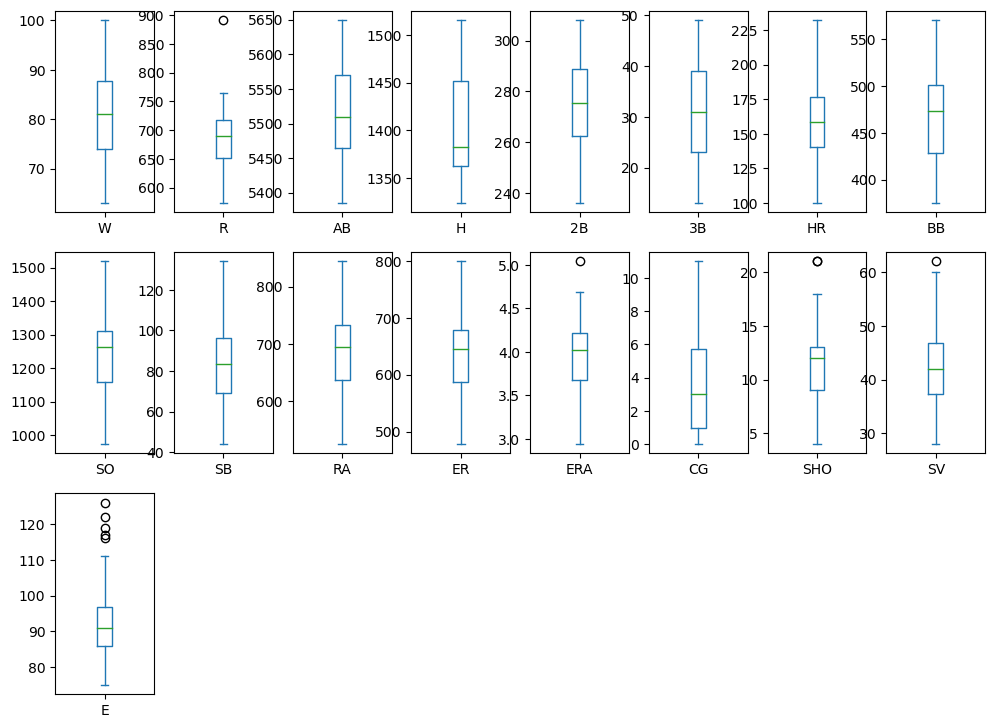

In [32]:
df.plot(kind="box",subplots=True,layout=(4,8),figsize=(12,12))

In [33]:
#Errors are not correlated to win, Error hae .

<Axes: xlabel='SB', ylabel='Density'>

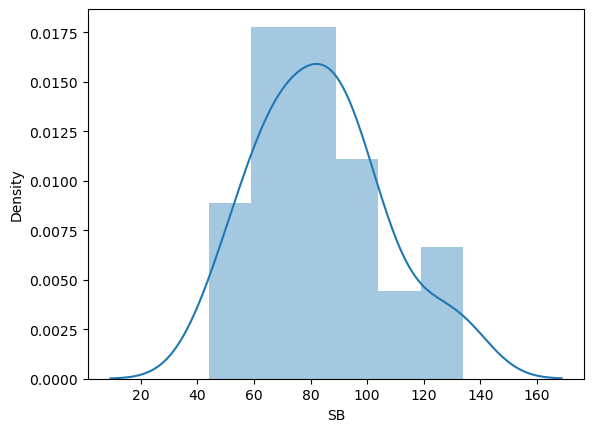

In [34]:
sns.distplot(df["SB"])

<Axes: xlabel='SB', ylabel='Density'>

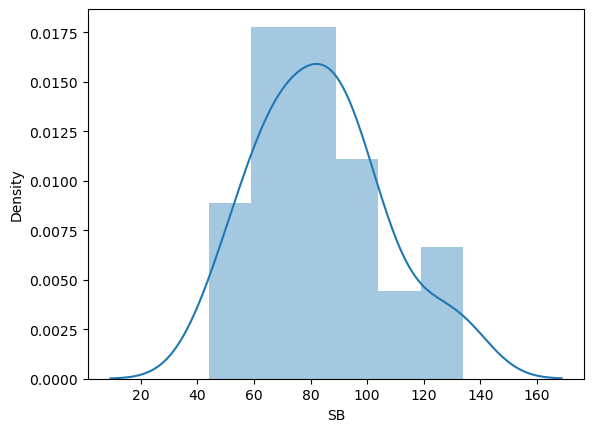

In [35]:
sns.distplot(df["SB"])

<Axes: xlabel='SB', ylabel='Density'>

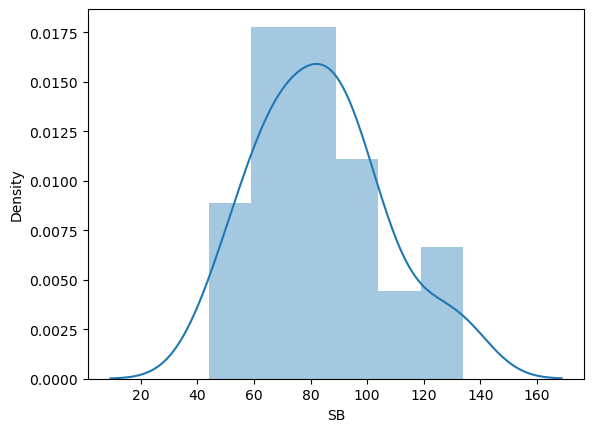

In [36]:
sns.distplot(df["SB"])

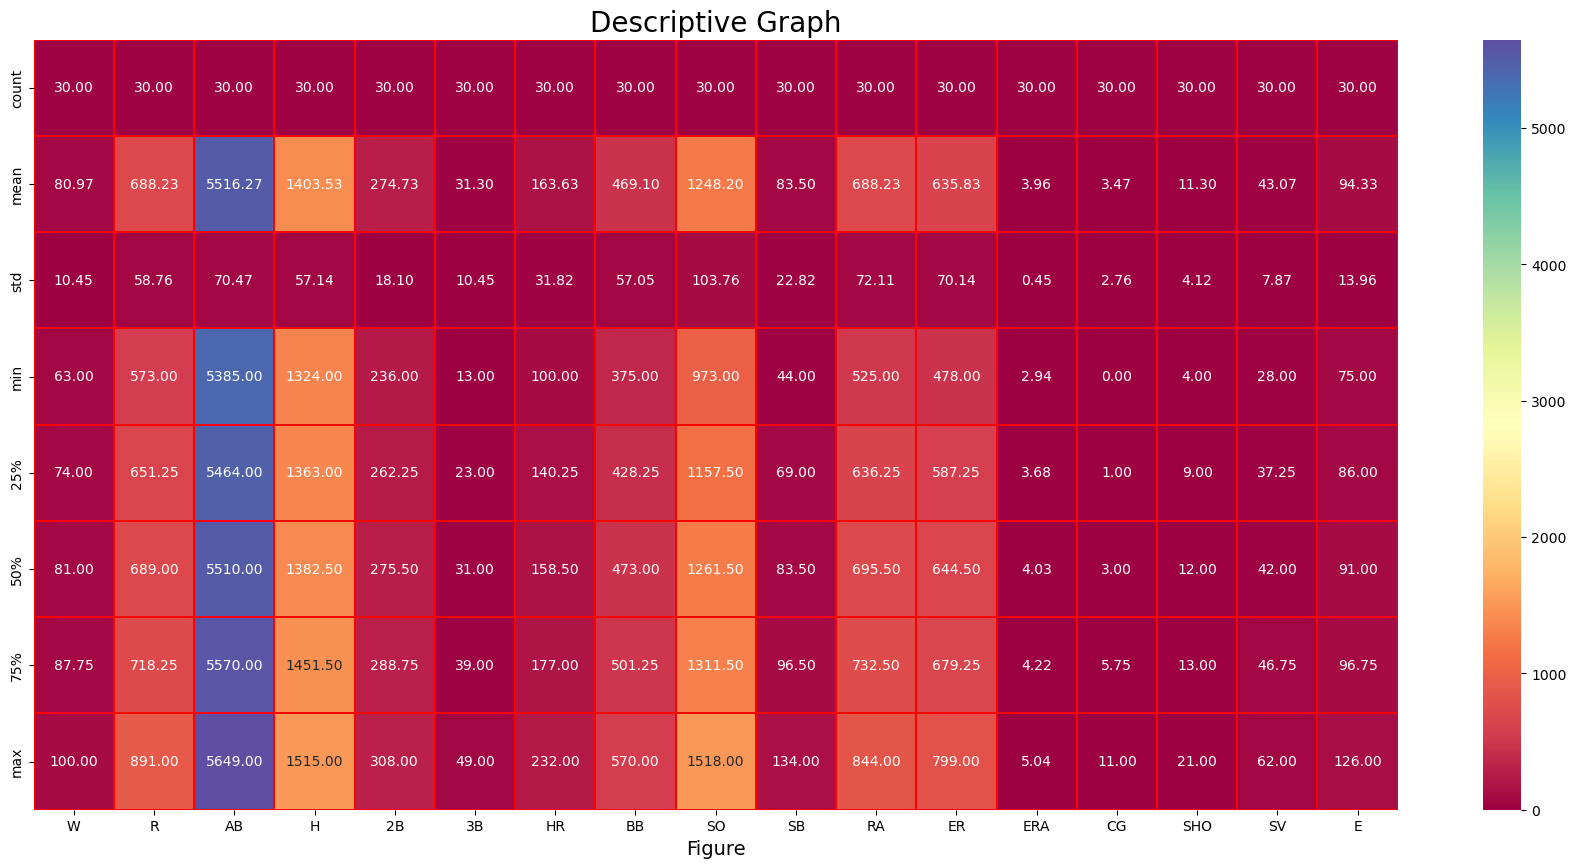

In [37]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="red",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

    This program is designed to visually represent descriptive statistics (like mean, min, max, quartiles) of the numerical columns in the DataFrame df using a heatmap.
    The annotated values inside each cell of the heatmap provide additional insights into the statistical summary of the dataset.
    The color map (cmap="Spectral") enhances the visualization by assigning different colors to different numerical values, making it easier to interpret the patterns and distributions.

at bats (AB) mean.max,std is very high

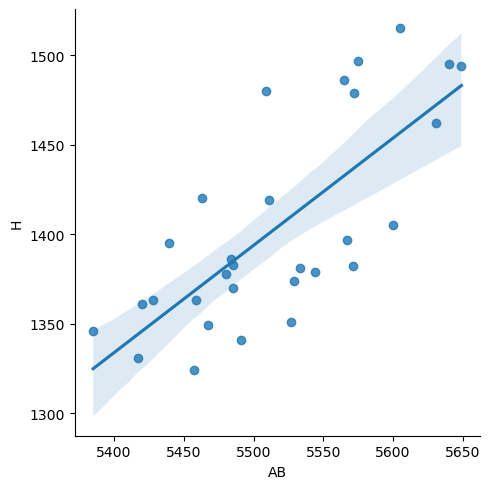

In [38]:
import seaborn as sns
sns.lmplot(x="AB",y="H",data=df,palette="colorblind")

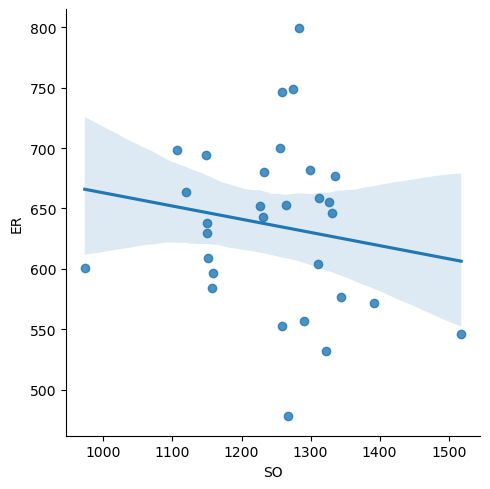

In [39]:
sns.lmplot(x="SO",y="ER",data=df,palette="colorblind")

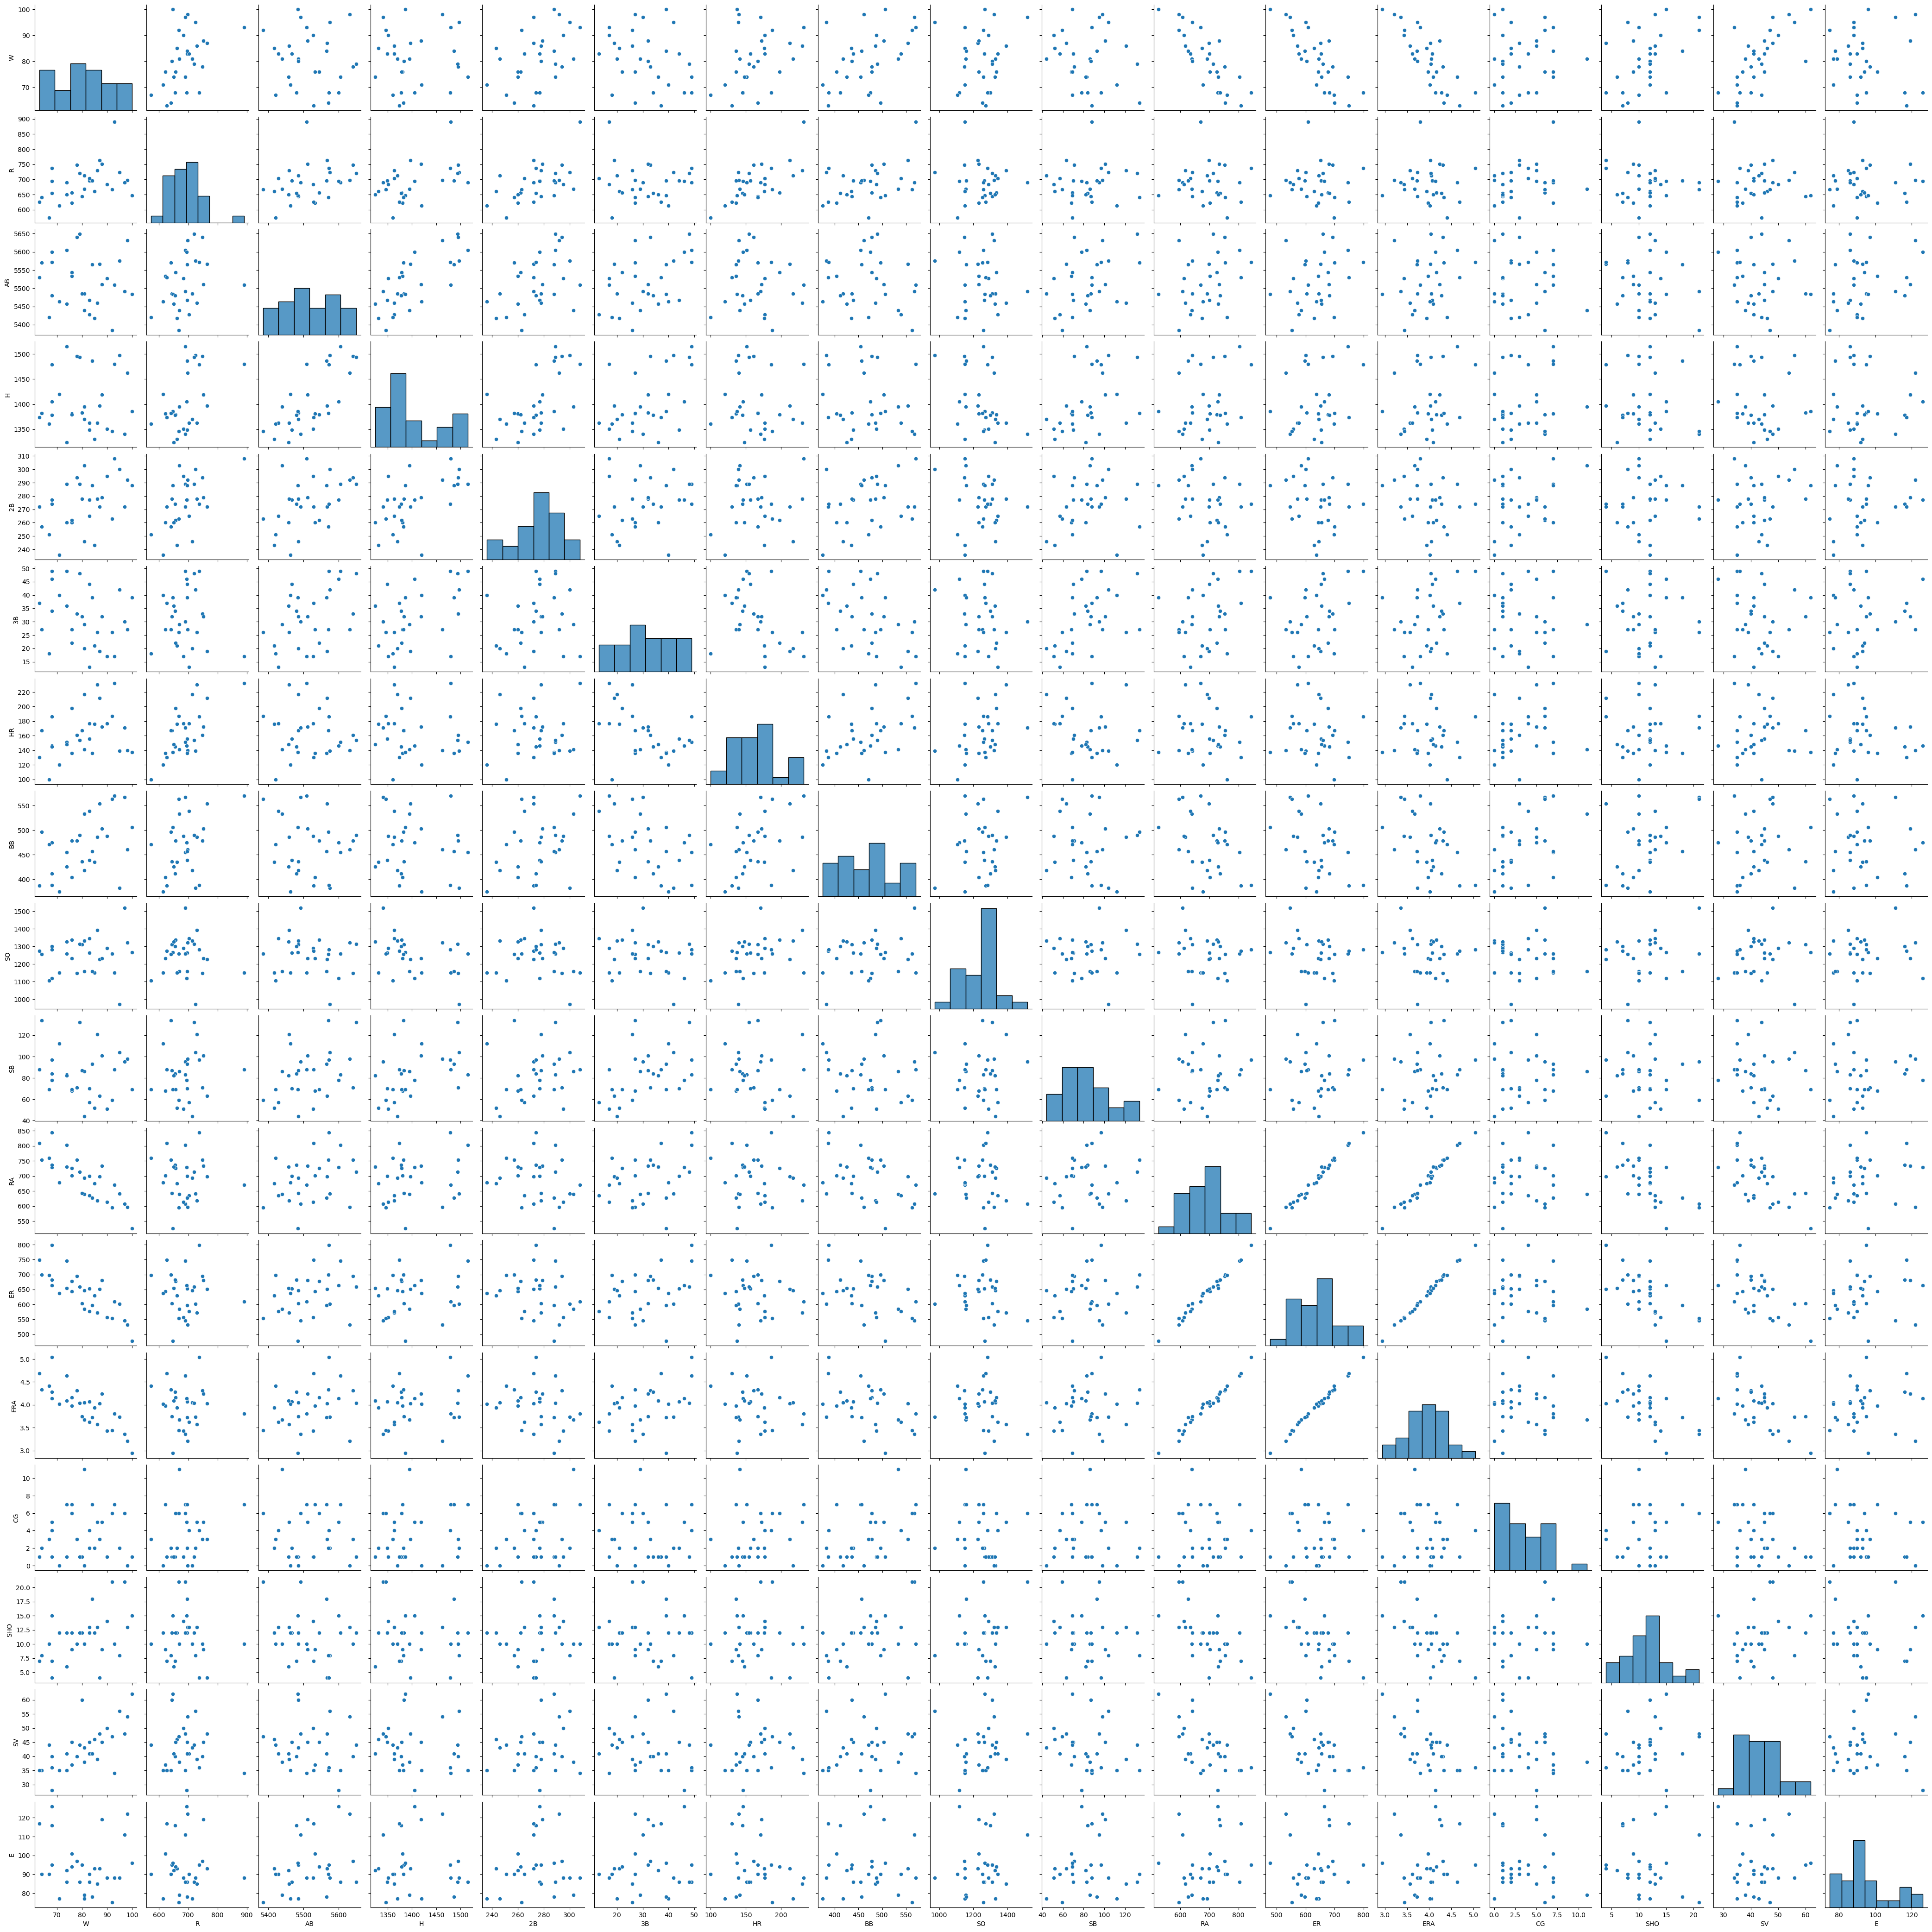

In [40]:
sns.pairplot(data=df,palette="Dark2")

Now we compute z-scores using zscore(df), you can identify data points that are unusually high or low relative to the rest of the dataset
Z-scores are a way to standardize data and identify outliers. A z-score indicates how many standard deviations an observation is away from the mean of the dataset.
By computing z-scores using zscore(df), you can identify data points that are unusually high or low relative to the rest of the dataset.

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [42]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [44]:
x=df.drop("W",axis=1)
y=df["W"]
print(x.shape)
print(y.shape)

(30, 16)
(30,)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.metrics import r2_score

In [48]:
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 Score is ",maxAccu,"on Random_state",maxRS)

Maximum r2 Score is  0.9172122929401223 on Random_state 114


In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=400)

In [51]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score:",r2_score(y_test,pred_LR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.5391678833119165
R2_score on training Data: 96.4928113618777
Mean Absolute Error: 5.255113757234966
Mean Squared Error: 35.03461943907677
Root Mean Squared Error: 5.919004936564656


In [52]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (21, 16)
Size of x_test : (9, 16)
Size of x_train : (21,)
Size of x_train : (9,)


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
for i in df:
    df[i]=le.fit_transform(df[i])
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,20,21,23,27,19,18,5,1,0,22,9,9,9,2,3,17,6
1,11,16,8,4,11,19,13,10,14,8,16,17,18,2,6,11,5
2,10,12,4,16,20,9,7,23,6,14,8,7,7,8,5,5,3
3,6,2,17,12,5,8,3,4,9,6,17,14,13,7,4,4,14
4,5,14,25,28,15,22,11,11,13,12,27,27,27,7,6,2,5
5,19,27,13,23,21,1,26,28,5,16,11,11,11,7,5,1,6
6,15,26,20,17,9,3,23,25,8,5,15,16,15,3,0,14,9
7,10,19,11,8,2,4,24,6,24,0,14,15,17,0,5,9,1
8,9,5,11,14,12,11,15,9,20,15,10,10,10,1,6,18,11
9,7,24,27,26,17,12,14,16,3,9,24,24,24,3,5,7,13


In [56]:
rf_final = RandomForestClassifier(criterion="entropy", max_depth=20, min_samples_leaf=3,
                                   min_samples_split=10, max_features=0.5, n_estimators=200, random_state=487)
rf_final.fit(x_train,y_train)
predrf=rf_final.predict(x_test)
print("accuracy:",accuracy_score(y_test,predrf))
print("confusion matrix:\n",confusion_matrix(y_test,predrf))
print("classification report:\n",classification_report(y_test,predrf))

accuracy: 0.1111111111111111
confusion matrix:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
classification report:
               precision    recall  f1-score   support

          68       0.17      1.00      0.29         1
          71       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          88       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1

    accuracy                           0.11         9
   macro avg       0.02      0.10      0.03    

In [57]:
import pickle

In [58]:
with open("Baseball case study.pkl","wb") as f:
    pickle.dump(df,f)

In [59]:
with open("Baseball case study.pkl","rb") as f:
    Baseball=pickle.load(f)

In [60]:
import joblib

In [76]:
#pip install joblib

In [77]:
#pip install --upgrade scikit-learn joblib

In [64]:
import joblib

In [84]:
joblib.dump(clf, "Baseball.obj")

['Baseball.obj']

In [78]:
#!pip show scikit-learn
#!pip show joblib

In [85]:
import joblib
joblib.dump(clf, "Baseball.obj")

['Baseball.obj']

In [86]:
Baseballcase=joblib.load("Baseball.obj")

In [92]:
clf_from_joblib=joblib.load("Baseball.obj")

In [94]:
clf_from_joblib.predict(x_test)

array([80, 80, 80, 64, 81, 86, 80, 80, 68], dtype=int64)